# TP 1 - Partie 2 - IMBERT Nathan, DUSSERT Carla, MARCHELLI Yann
# Tâche 2 : θ-schéma

Question 1 : on trouve que A est une matrice tridiagonale de diagonale 1+2αθ, et de sous-diagonales -αθ.
Et que B est une matrice tridiagonale de diagonal 1-2α(1-θ), et de sous-diagonales α(1-θ)
On les implémente donc dans le code, ainsi que le paramètre θ.

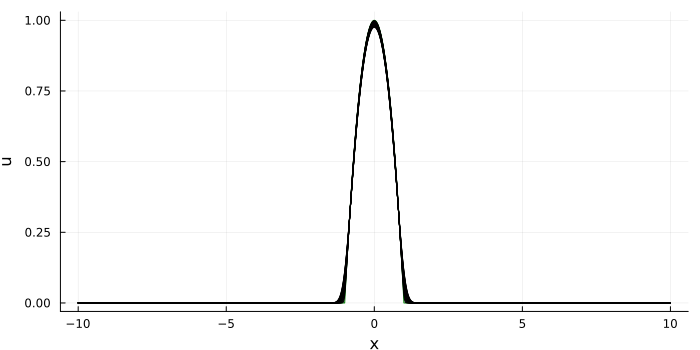

In [71]:
using LinearAlgebra, Plots

# Parameters
L = 10.0                               # domain half size

#Lorsque L augmente, la diffusion augmente et inversement

Nx = 1600         # grid size (space)

Δx = 2*L/Nx                            # step size (space)
#Δx = L/Nx
σ = 0.4                              # CFL (jusqu'à 0.5)
θ=0.75                              #Nouveau paramètre θ (Question 2)
#Tâche 2, Q3 : On remarque qu'avec θ=1, et sigma=0.5, on retrouve les résultats de la tâche 1 (voir graphiques).
#En effet, avec θ=1, on retombe sur le schéma explicite.
#Q4 : on prend θ=0.25,0.5,0.75 et on modifie sigma dans {0,1;0.25;0.4}


Δt = 0.0000001                 # step size (time) 

Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition

# θ-schéma (Question 1)
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

B = Tridiagonal(σ*ones(Nx)*(1-θ), 1 .- 2*σ*ones(Nx+1)*(1-θ), σ*ones(Nx)*(1-θ))
A = Tridiagonal(-σ*ones(Nx)*θ, 1 .+ 2*σ*ones(Nx+1)*θ, -σ*ones(Nx)*θ)

for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

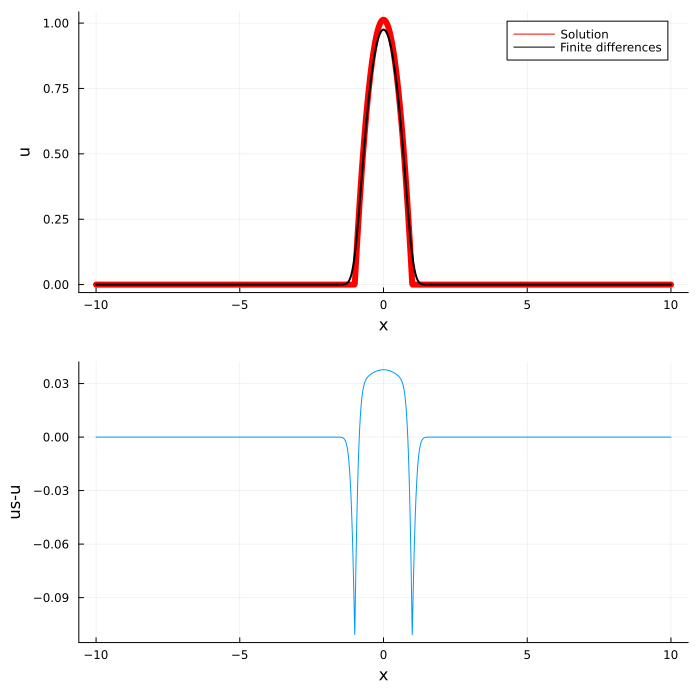

Δx: 0.0125	 Δt:1.0e-7	 max error: 0.11072448032731273


In [72]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

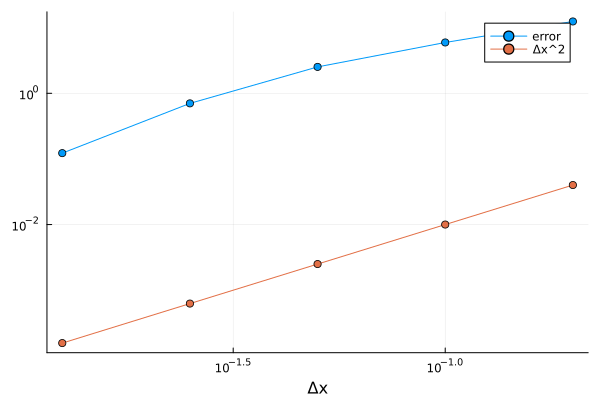

In [70]:
# Precision test
####################### Tâche 2 - Q3 ############################
#le cas θ=1 a été vu précédemment (schéma explicite.)

#cas θ=0.8
Δx = [ 0.2, 0.1, 0.05, 0.025, 0.0125 ]
errx = [ 12.431379067586592,  5.949767968006035, 2.524700334697945, 0.702115603229177, 0.12248721316341213 ]

#cas θ=0.5
Δx1 = [ 0.2, 0.1, 0.05, 0.025, 0.0125 ]
errx1 = [ 12.431577397773312,  5.950098785733552, 2.5250118635554606, 0.702146561203825, 0.12254023546035084 ]

#cas θ=0.2
Δx2 = [ 0.2, 0.1, 0.05, 0.025, 0.0125 ]
errx2 = [ 12.431774699694724,  5.950428328062037, 2.5253235142277672, 0.7021775297258912, 0.12259319769017318 ]

plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")
#p2=plot(Δx1, errx1, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx_2", label="error_2")
#p2=plot!(Δx1, Δx1.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx_2", label="Δx_2^2")
#p3=plot(Δx2, errx2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx_3", label="error_3")
#p3=plot!(Δx2, Δx2.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx_3", label="Δx_3^2")


####################### Tâche 2 - Q4 ############################
#θ=0.25, σ=0.1 : l'erreur max avec Δx= 0.0125 est plus faible (0.005698).
#σ=0.4 : errmax à Δx: 0.0125 vaut 0.110803. L'erreur max est donc proportionnelle à σ.
#Avec θ=0.5 ou 0.75, on obtient encore des valeurs semblablement identiques. On remarque ainsi que l'erreur dépend
#principalement de σ.
#On en conclut donc que le θ-schéma est tout autant efficace pour les différentes valeurs de θ, et c'est surtout la CFL
#qui va définir sa précision. Il en va de même pour les schémas explicite et implicite qui sont des cas particuliers du
#θ-schéma.



x